9.898171392646551 6.07728169441554 3.169271375303503 2.1900916586499846 1.1188958850763269 3.027682752341311 0.8660254037844387 0.49999999999999994
6.07728169441554 9.898171392646548 3.169271375303503 1.1188958850763273 2.1900916586499855 3.0276827523413115 0.5000000000000001 0.8660254037844386
9.898171392646551 6.07728169441554 3.169271375303503 2.1900916586499846 1.1188958850763269 3.027682752341311 0.8660254037844387 0.49999999999999994
6.07728169441554 9.898171392646548 3.169271375303503 1.1188958850763273 2.1900916586499855 3.0276827523413115 0.5000000000000001 0.8660254037844386


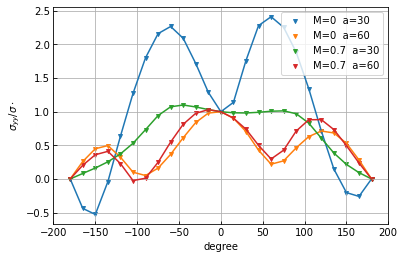

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha = 60
M=0.7
p1= 0.236
q1= 0.902
p2 = -0.400
q2 = 0.494
list = [[0,30,0.188,0.865,-0.757,1.41],[0,60,0.24,1.104,-0.404,0.608],
        [0.7,30,0.185,0.652,-0.755,1036],[0.7,60,0.236,0.902,-0.4,0.494]]

# list = [[0,30,0.188,0.865,-0.757,1.41]]
# list = [[0,30,0.188,0.865,-0.757,1.41]]
for M, alpha, p1,q1, p2,q2 in list:

    EL = 11.75
    ET = 4.7
    GLT= 2.1
    vLT = 0.44
    density =1200

    cs = np.sqrt(GLT /density)
    c = cs * M

    l = np.cos(np.deg2rad(alpha))
    m= np.sin(np.deg2rad(alpha))

    C11_ = EL / (1-(ET / EL)*vLT**2)
    C22_ = (ET/EL)*C11_
    C12_ = vLT*C22_
    C66_ = GLT



    C11 = C11_*l**4 + 2*(C12_ +2*C66_) * l**2 * m**2 + C22_*m**4
    C22 = C22_*l**4 + 2*(C12_ +2*C66_) * l**2*m**2+C11_*m**4
    C12 = (C11_ + C22_ -4*C66_)* np.power(l,2) * m**2 +C12_*(l**4+m**4)
    C16 = (C11_-C12_ -2*C66_)*l**3*m +(C12_ - C22_ +2*C66_)*l*m**3
    C26 = (C11_ - C12_ -2*C66_)*l*m**3 + (C12_-C22_ +2*C66_)*l**3*m
    C66 = (C11_ + C22_ - 2 *C12_ - 2*C66_)*l**2 * m**2 +C66_*(l**4+m**4)
    print(C11, C22,C12,C16,C26,C66, l,m)
    C21 = -C12

    a1R_1 = p1 * (C26*(p1**2-q1**2)+p1*(C12+2*C66)+3*C16)- q1 *(2*C26*p1*q1 + q1*(C12+2*C66)+(C11-density*c**2))
    a1I_1 = q1 * (C26*(p1**2-q1**2)+p1*(C12+2*C66)+3*C16)+ p1 *(2*C26*p1*q1 + q1*(C12+2*C66))
    b1R_1 = p1 * (C66*(p1**2-q1**2)+p1*(2*C16-C26)+C11-C12-C66-density*c**2)-q1*(2*C66*p1*q1 + q1*(2*C16-C26))-C16
    b1I_1 = q1 * (C66*(p1**2-q1**2)+p1*(2*C16-C26)+C11-C12-C66-density*c**2)-p1*(2*C66*p1*q1 + q1*(2*C16-C26))
    a2R_1 = p1 * (C22*(p1**2-q1**2)+3*p1*C26 +C12+C66-density*c**2) - q1*(2*C22*p1*q1 + 3*q1*C26)+C16
    a2I_1 = q1 * (C22*(p1**2-q1**2)+3*p1*C26 +C12+C66-density*c**2) + p1*(2*C22*p1*q1 + 3*q1*C26)
    b2R_1 = p1 * (C26*(p1**2-q1**2)+p1*(C12+C66-C22)+C16-2*C26) - q1*(2*C26*p1*q1 - q1*(C12+C66-C22))-C66 +density*c**2
    b2I_1 = q1 * (C26*(p1**2-q1**2)+p1*(C12+C66-C22)+C16-2*C26) + p1*(2*C26*p1*q1 - q1*(C12+C66-C22))

    a1R_2 = p2 * (C26*(p2**2-q2**2)+p2*(C12+2*C66)+3*C16)- q2 *(2*C26*p2*q2 + q2*(C12+2*C66)+(C11-density*c**2))
    a1I_2 = q2 * (C26*(p2**2-q2**2)+p2*(C12+2*C66)+3*C16)+ p2 *(2*C26*p2*q2 + q2*(C12+2*C66))
    b1R_2 = p2 * (C66*(p2**2-q2**2)+p2*(2*C16-C26)+C11-C12-C66-density*c**2)-q2*(2*C66*p2*q2 + q2*(2*C16-C26))-C16
    b1I_2 = q2 * (C66*(p2**2-q2**2)+p2*(2*C16-C26)+C11-C12-C66-density*c**2)-p2*(2*C66*p2*q2 + q2*(2*C16-C26))
    a2R_2 = p2 * (C22*(p2**2-q2**2)+3*p2*C26 +C12+C66-density*c**2) - q2*(2*C22*p2*q2 + 3*q2*C26)+C16
    a2I_2 = q2 * (C22*(p2**2-q2**2)+3*p2*C26 +C12+C66-density*c**2) + p2*(2*C22*p2*q2 + 3*q2*C26)
    b2R_2 = p2 * (C26*(p2**2-q2**2)+p2*(C12+C66-C22)+C16-2*C26) - q2*(2*C26*p2*q2 - q2*(C12+C66-C22))-C66 +density*c**2
    b2I_2 = q2 * (C26*(p2**2-q2**2)+p2*(C12+C66-C22)+C16-2*C26) + p2*(2*C26*p2*q2 - q2*(C12+C66-C22))


    w1R, w1I = (a1R_1 *b1R_1 + a1I_1*b1I_1)/(b1R_1**2 + b1I_1**2), (a1I_1 *b1R_1 - a1R_1*b1I_1)/(b1R_1**2 + b1I_1**2)
    w2R, w2I = (a2R_2 *b2R_2 + a2I_2*b2I_2)/(b2R_2**2 + b2I_2**2), (a2I_2 *b2R_2 - a2R_2*b2I_2)/(b2R_2**2 + b2I_2**2)

    M1R,M1I = p1**2-q1**2, 2*q1*p1
    M2R,M2I = p2**2-q2**2, 2*q2*p2
    m12 = complex(M1R, M1I)
    m22 = complex(M2R, M2I)

    W1R,W1I = p1*w1R -q1*w1I , q1*w1R+p1*w1I
    W2R,W2I = p2*w2R -q2*w2I , q2*w2R+p2*w2I
    m1w1 = complex(W1R,W1I)
    m2w2 = complex(W2R,W2I)

    w1_m1_1 = complex((w1R*(M1R-1)-w1I*M1I), (w1I*(M1R-1)+ w1R*M1I))
    w2_m1_1 = complex((w2R*(M2R-1)-w2I*M2I), (w2I*(M2R-1)+ w2R*M2I))
    G1 = C16*(1-m1w1)+C26*(m12+m1w1)+C66*(2*np.sqrt(m12)-w1_m1_1)
    G2 = C16*(1-m2w2)+C26*(m22+m2w2)+C66*(2*np.sqrt(m22)-w2_m1_1)
    G1R = C16*(1-W1R)+C26*(M1R + W1R)+C66*(2*p1-w1R*(M1R-1)+w1I*M1I)
    G2R = C16*(1-W2R)+C26*(M2R + W2R)+C66*(2*p2-w2R*(M2R-1)+w2I*M2I)
    G1I = -C16*W1I +C26*(M1I +W1I)+C66 * (2*q1-w1I*(M1R-1)-w1R*M1I)
    G2I = -C16*W2I +C26*(M2I +W2I)+C66 * (2*q2-w2I*(M2R-1)-w2R*M2I)
    H1 = C12*(1-m1w1)+C22*(m12+m1w1)+C26 * (2*np.sqrt(m12)-w1_m1_1)
    H2 = C12*(1-m2w2)+C22*(m22+m2w2)+C26 * (2*np.sqrt(m22)-w2_m1_1)
    H1R = C12*(1-W1R)+ C22*(M1R+W1R)+C26*(2*p1-w1R*(M1R-1)+w1I*M1I)
    H2R = C12*(1-W2R)+ C22*(M2R+W2R)+C26*(2*p2-w2R*(M2R-1)+w2I*M2I)
    H1I = -C12*W1I +C22*(M1I+W1I)+C26*(2*q1-w1I*(M1R-1)-w1R*M1I)
    H2I = -C12*W2I +C22*(M2I+W2I)+C26*(2*q2-w2I*(M2R-1)-w2R*M2I)

    DR = H2R*G1R - H1R*G2R + H1I*G2I - H2I*G1I
    DI = H2I*G1R - H1I*G2R + H2R*G1I - H1R*G2I

    O1 = (H1R*DR +H1I*DI) / (DR**2+DI**2)
    O2 = (H2R*DR +H2I*DI) / (DR**2+DI**2)
    P1 = (H1I*DR -H1R*DI) / (DR**2+DI**2)
    P2 = (H2I*DR -H2R*DI) / (DR**2+DI**2)
    M1 = (G1R*DR +G1I*DI) / (DR**2+DI**2)
    M2 = (G2R*DR +G2I*DI) / (DR**2+DI**2)
    N1 = (G1I*DR -G1R*DI) / (DR**2+DI**2)
    N2 = (G2I*DR -G2R*DI) / (DR**2+DI**2)

    F1R = -C11*W1I + C12*(M1I+W1I)+C16*(2*q1-w1I*(M1R-1)+w1I*M1I)
    F2R = -C11*W2I + C12*(M2I+W2I)+C16*(2*q2-w2I*(M2R-1)+w2I*M2I)
    F1I = -C11*W1I +C12*(M1I+W1I)+C16*(2*q1-w1I*(M1R-1)-w1R*M1I)
    F2I = -C11*W2I +C12*(M2I+W2I)+C16*(2*q2-w2I*(M2R-1)-w2R*M2I)

    theta = np.deg2rad(np.arange(-180,180+15,15))


    theta1 = np.arctan2(q1*np.sin(theta),(np.cos(theta)+p1*np.sin(theta)))
    theta2 = np.arctan2(q2*np.sin(theta),(np.cos(theta)+p2*np.sin(theta)))
    r1 = np.sqrt((np.cos(theta)+p1*np.sin(theta))**2 + (q1*np.sin(theta))**2)
    r2 = np.sqrt((np.cos(theta)+p2*np.sin(theta))**2 + (q2*np.sin(theta))**2)
    sigma_xx = -(F1R*M2 - F1I*N2)*r1**-0.5*np.cos(-0.5*theta1)+(F1I*M2 + F1R*N2)*r1**-0.5*np.sin(-0.5*theta1) + \
               (F2R*M1 - F2I*N1)*r2**-0.5*np.cos(-0.5*theta2) -(F2I*M1 + F2R*N1)*r2**-0.5*np.sin(-0.5*theta2) + \
               (F1R*O2 - F1I*P2)*r1**-0.5*np.cos(-0.5*theta1)-(F1I*O2 + F1R*P2)*r1**-0.5*np.sin(-0.5*theta1) - \
               (F2R*O1 - F2I*P1)*r2**-0.5*np.cos(-0.5*theta2) + (F2I*O1 + F2R*P1)*r2**-0.5*np.sin(-0.5*theta2)


    sigma_yy = -(H1R*M2 - H1I*N2)*r1**-0.5*np.cos(-0.5*theta1)+(H1I*M2 + H1R*N2)*r1**-0.5*np.sin(-0.5*theta1) + \
               (H2R*M1 - H2I*N1)*r2**-0.5*np.cos(-0.5*theta2) -(H2I*M1 + H2R*N1)*r2**-0.5*np.sin(-0.5*theta2) + \
               (H1R*O2 - H1I*P2)*r1**-0.5*np.cos(-0.5*theta1)-(H1I*O2 + H1R*P2)*r1**-0.5*np.sin(-0.5*theta1) - \
               (H2R*O1 - H2I*P1)*r2**-0.5*np.cos(-0.5*theta2) + (H2I*O1 + H2R*P1)*r2**-0.5*np.sin(-0.5*theta2)
    # plt.plot(np.rad2deg(theta),theta1, color='red')
    # plt.plot(np.rad2deg(theta),theta2, color='black')
    plt.plot(np.rad2deg(theta), sigma_yy)
    plt.scatter(np.rad2deg(theta), sigma_yy, s=15,marker='v',label='M={}  a={}'.format(M,alpha))
plt.tick_params(direction='in')
plt.legend()
plt.xlim(-200,200)
plt.grid()
plt.xlabel('degree')
plt.ylabel('$\sigma_{yy} / \sigma\cdot$')
plt.savefig('./bb.png')
plt.show()

In [11]:
from sympy import *

a11, a12, a22, a66 = symbols('a11, a12, a22, a66')
l, m = symbols('l m')

sigma_T = Matrix([[l**2, m**2, 2*l*m],
                 [m**2, l**2, -2*l*m],
                 [-l*m, l*m, l**2-m**2]])

strain_T = Matrix([[l**2, m**2, l*m],
                 [m**2, l**2, -l*m],
                 [-2*l*m, 2*l*m, l**2-m**2]])

strain = Matrix([[a11, a12, 0],
                 [a12, a22, 0],
                 [0,0,a66]])

strain_xy = strain_T.inv() * strain * sigma_T
simplify(strain_xy)

Matrix([
[                   (a11*l**4 + 2*a12*l**2*m**2 + a22*m**4 + a66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4), (-a66*l**2*m**2 + l**2*(a12*l**2 + a22*m**2) + m**2*(a11*l**2 + a12*m**2))/(l**4 + 2*l**2*m**2 + m**4), l*m*(2*a11*l**2 - 2*a12*l**2 + 2*a12*m**2 - 2*a22*m**2 - a66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[(-a66*l**2*m**2 + l**2*(a11*m**2 + a12*l**2) + m**2*(a12*m**2 + a22*l**2))/(l**4 + 2*l**2*m**2 + m**4),                    (a11*m**4 + 2*a12*l**2*m**2 + a22*l**4 + a66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4), l*m*(2*a11*m**2 + 2*a12*l**2 - 2*a12*m**2 - 2*a22*l**2 + a66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[        l*m*(-a66*(l**2 - m**2) + 2*l**2*(a11 - a12) + 2*m**2*(a12 - a22))/(l**4 + 2*l**2*m**2 + m**4),          l*m*(a66*(l**2 - m**2) + 2*l**2*(a12 - a22) + 2*m**2*(a11 - a12))/(l**4 + 2*l**2*m**2 + m**4),  (a66*(l**2 - m**2)**2 + 4*l**2*m**2*(a11 - a12) - 4*l**2*m**2*(a12 - a22))/(l**4 + 2*l**2*m**2 + m**4)]])

In [13]:
""" 중간고사 """

Matrix([
[                   (a11*l**4 + 2*a12*l**2*m**2 + a22*m**4 + a66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4), (-a66*l**2*m**2 + l**2*(a12*l**2 + a22*m**2) + m**2*(a11*l**2 + a12*m**2))/(l**4 + 2*l**2*m**2 + m**4), l*m*(2*a11*l**2 - 2*a12*l**2 + 2*a12*m**2 - 2*a22*m**2 - a66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[(-a66*l**2*m**2 + l**2*(a11*m**2 + a12*l**2) + m**2*(a12*m**2 + a22*l**2))/(l**4 + 2*l**2*m**2 + m**4),                    (a11*m**4 + 2*a12*l**2*m**2 + a22*l**4 + a66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4), l*m*(2*a11*m**2 + 2*a12*l**2 - 2*a12*m**2 - 2*a22*l**2 + a66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[        l*m*(-a66*(l**2 - m**2) + 2*l**2*(a11 - a12) + 2*m**2*(a12 - a22))/(l**4 + 2*l**2*m**2 + m**4),          l*m*(a66*(l**2 - m**2) + 2*l**2*(a12 - a22) + 2*m**2*(a11 - a12))/(l**4 + 2*l**2*m**2 + m**4),  (a66*(l**2 - m**2)**2 + 4*l**2*m**2*(a11 - a12) - 4*l**2*m**2*(a12 - a22))/(l**4 + 2*l**2*m**2 + m**4)]])

In [ ]:
from sympy import *

a11, a12, a22, a66 = symbols('a11, a12, a22, a66')
l, m = symbols('l m')

sigma_T = Matrix([[l**2, m**2, 2*l*m],
                 [m**2, l**2, -2*l*m],
                 [-l*m, l*m, l**2-m**2]])

strain_T = Matrix([[l**2, m**2, l*m],
                 [m**2, l**2, -l*m],
                 [-2*l*m, 2*l*m, l**2-m**2]])

strain = Matrix([[a11, a12, 0],
                 [a12, a22, 0],
                 [0,0,a66]])

strain_xy = strain_T.inv() * strain * sigma_T
simplify(strain_xy)

In [15]:
from sympy import *

c11, c12, c22, c66 = symbols('c11, c12, c22, c66')
l, m = symbols('l m')

sigma_T = Matrix([[l**2, m**2, 2*l*m],
                 [m**2, l**2, -2*l*m],
                 [-l*m, l*m, l**2-m**2]])

strain_T = Matrix([[l**2, m**2, l*m],
                 [m**2, l**2, -l*m],
                 [-2*l*m, 2*l*m, l**2-m**2]])

stress = Matrix([[c11, c12, 0],
                 [c12, c22, 0],
                 [0,0,c66]])

stress_xy = sigma_T.inv() * stress * strain_T
simplify(stress_xy)

Matrix([
[                   (c11*l**4 + 2*c12*l**2*m**2 + c22*m**4 + 4*c66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4), (-4*c66*l**2*m**2 + l**2*(c12*l**2 + c22*m**2) + m**2*(c11*l**2 + c12*m**2))/(l**4 + 2*l**2*m**2 + m**4),  l*m*(c11*l**2 - c12*l**2 + c12*m**2 - c22*m**2 - 2*c66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[(-4*c66*l**2*m**2 + l**2*(c11*m**2 + c12*l**2) + m**2*(c12*m**2 + c22*l**2))/(l**4 + 2*l**2*m**2 + m**4),                    (c11*m**4 + 2*c12*l**2*m**2 + c22*l**4 + 4*c66*l**2*m**2)/(l**4 + 2*l**2*m**2 + m**4),  l*m*(c11*m**2 + c12*l**2 - c12*m**2 - c22*l**2 + 2*c66*(l**2 - m**2))/(l**4 + 2*l**2*m**2 + m**4)],
[            l*m*(-2*c66*(l**2 - m**2) + l**2*(c11 - c12) + m**2*(c12 - c22))/(l**4 + 2*l**2*m**2 + m**4),              l*m*(2*c66*(l**2 - m**2) + l**2*(c12 - c22) + m**2*(c11 - c12))/(l**4 + 2*l**2*m**2 + m**4), (c66*(l**2 - m**2)**2 + l**2*m**2*(c11 - c12) - l**2*m**2*(c12 - c22))/(l**4 + 2*l**2*m**2 + m**4)]])

In [ ]:
"""기말고사"""

In [27]:
from sympy import *

Qxx, Qyy, Qxy, Qss  = symbols('Qxx Qyy Qxy Qss')
Q11, Q22, Q12, Q66, Q16, Q26  = symbols('Q11 Q22 Q12 Q66 Q16 Q26')
n, m = symbols('n m')

stiffness = Matrix([[m**4,n**4, 2*m**2*n**2, 4*m**2*n**2],
                    [n**4,m**4, 2*m**2*n**2, 4*m**2*n**2]])
stiffness

1/8*(3*Qxx + Qyy + 2*Qxy +4*Qss) + 1/8*(Qxx + Qyy+6*Qxy - 4*Qss)

0.5*Qxx + 1.0*Qxy + 0.25*Qyy

In [79]:
import numpy as np

Elx, Ety, Esx, vlt = 38.6*1000, 8.27*1000, 4.14*1000, 0.26

a11, a12, a22, a66 = 1/Elx, -vlt/Elx,1/Ety , 1/Esx

l = np.cos(np.deg2rad(30))
m = np.sin(np.deg2rad(30))

sigma_T = np.array([[l**2, m**2, 2*l*m],
                 [m**2, l**2, -2*l*m],
                 [-l*m, l*m, l**2-m**2]])

strain_T = np.array([[l**2, m**2, l*m],
                 [m**2, l**2, -l*m],
                 [-2*l*m, 2*l*m, l**2-m**2]])

strain = np.array([[a11, a12, 0],
                 [a12, a22, 0],
                 [0,0,a66]])

input_stress=np.array([[100],[200],[50]])

input_strain = np.dot(np.dot(np.dot(np.linalg.inv(strain_T), strain),sigma_T),input_stress)
print(np.dot(np.dot(np.linalg.inv(strain_T), strain),sigma_T )*10**3)
input_strain

[[ 0.06489392 -0.02196988 -0.05873236]
 [-0.02196988  0.11240005 -0.02355066]
 [-0.05873236 -0.02355066  0.18060939]]


array([[-0.0008412 ],
       [ 0.01910549],
       [-0.0015529 ]])

In [75]:
a11, a12, a22, a66

(0.025906735751295335,
 -0.006735751295336788,
 0.12091898428053205,
 0.24154589371980678)

In [36]:
c11, c12, c22, c66 = 39.16 , 2.182, 8.392, 4.14

sigma_T = np.array([[l**2, m**2, 2*l*m],
                 [m**2, l**2, -2*l*m],
                 [-l*m, l*m, l**2-m**2]])

strain_T = np.array([[l**2, m**2, l*m],
                 [m**2, l**2, -l*m],
                 [-2*l*m, 2*l*m, l**2-m**2]])

stress = np.array([[c11, c12, 0],
                 [c12, c22, 0],
                 [0,0,c66]])*1000


result = np.dot(np.dot(np.dot(np.linalg.inv(sigma_T), stress),strain_T),input_strain)
result

array([[ 99.98518181],
       [200.00009635],
       [ 49.98708363]])

In [50]:
np.dot(np.dot(np.linalg.inv(sigma_T), stress),strain_T)

array([[26475.25      ,  7174.75      ,  9544.03296241],
       [ 7174.75      , 11091.25      ,  3778.90184941],
       [ 9544.03296241,  3778.90184941,  9132.75      ]])